# Predictive Modelling of Eating-Out Problem 
## Assignment -1 
### Data Sceince Technology and Systems 
#### Student Name: Tamzid Ibrahim
#### Student ID: u3265713

## Part A
### Importing and Understanding the Data

##### **Loading the required Packages**

In [74]:
# Loading the packages 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.express as px

##### **Loading the Zomato Data Set:** 

In [75]:
# Specifying the file path of the dataset
file_path = "data/zomato_df_final_data.csv"
# Loading the dataset 
zomato = pd.read_csv(file_path)


##### **Preliminary exploration** 

In [76]:
# Printing the size and shape of the data 
# Using the shape attribute to show the dimensionality of the dataset 
print("The shape of the data is:", zomato.shape) 
print("There are", zomato.shape[1], "columns and", zomato.shape[0], "rows in the data")
print("\n") # Printing a new line to add spacing between the two outputs

#


The shape of the data is: (10500, 17)
There are 17 columns and 10500 rows in the data




In [77]:
# Looking at the first few rows of the dataset
zomato.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


We can see that there are 10500 rows/observations in the dataset and there are 17 features/columns, from the name of the columns it can be understood that the dataset provides information about various restaurants in Sydney. The data details the restaurant's locations, cuisine types, pricing, customer rating etc.  

In [78]:
# Printing the summary of the dataset 
print(zomato.info())
# Printing the null values in the columns with missing values by using isnull and sum methods
print("\nNull values in each column: \n", zomato.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

While most columns are fully populated with data, some columns such as *cost*, *lat*, *lng*, *rating_number*, *rating_text*, *type*, *votes* and *cost_2* have missing values. With columns **rating_number**, **rating_text** and **votes** have the highest number of missing values. The presence of missing values in key attributes need to addressed in the data cleaning stage of the project. 

In [79]:
# Printing how many categorical and neumerical variables are in the data
# Identify categorical variables 
categorical_vars = zomato.select_dtypes(include=['object', 'bool']).columns.tolist()
# Identify numerical variables
numerical_vars = zomato.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("The number of categorical variables:", len(categorical_vars), "and the number of neumerical variables are:", len(numerical_vars))

The number of categorical variables: 11 and the number of neumerical variables are: 6


We can observe that there **11** **categorical variables** and **6** **numerical variables**. Not all of the columns might be required for building the predictive models. It will be discussed later. 

##### **Loading the Sydney geojson Data:** 

In [80]:
# Loading the geospatial data 
sydney_geo = gpd.read_file("data/sydney.geojson")
# Displaying the first few rows of the geospatial data 
sydney_geo.head()

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."
3,10016,Airds,Very good,2.380773,"POLYGON ((150.84000 -34.07817, 150.84077 -34.0..."
4,10022,Alexandria,Very good,3.503330,"POLYGON ((151.18603 -33.91660, 151.18562 -33.9..."


The GeoJSON contains geographical data for various suburbs in Sydney Australia, it includes information such as each suburbs unique code (SSC_CODE), name of the suburb (SSC_NAME), CONF_VALUE, the area of the suburb in square Kilometers (SQKM) and finally the geometry data, which is provided as polygons, this defines the boundaries of each suburb and will be used for plotting. 

<Axes: >

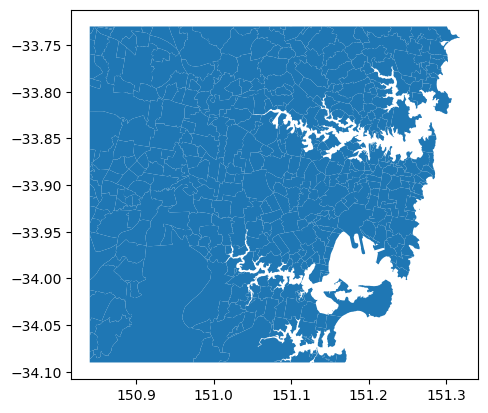

In [81]:
# Plotting the geopandas to evaluate whether data is read correctly or not
sydney_geo.plot()

To check data was loaded correctly, plot() was used to visualize the geographical boundaries of Sydney's suburbs. From the plot it can be seen that the suburbs are correctly represented. The map displays regions of Sydney. 

### Part A - 1 - Providing plots/graphs to answer questions

##### **How many unique cuisines are served by Sydney Restaurants**

In [82]:
# Extracting the cuisine information from the dataframe 
# The 'cuisine' column contains a string of lists, using 'eval' to convert the string to true lists
# It is left untouched if it is not string but a list   
cuisine_list = zomato['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else [])
# Iterating through each restaurant's list of cuisines, and flattening them out into individual cuisine names 
# A set is being used to store only the unique cuisines
unique_cuisines = set(cuisine for cuisines in cuisine_list for cuisine in cuisines)
# Finding the length of the unique_cuisine set 
n_u_cuiisine = len(unique_cuisines)
print(n_u_cuiisine)

134


There are one hundred and thirty four (134) unique cuisines served by restaurants in Sydney. Let's look at type of cuisines served by using a word cloud and also look at the top ten most common cuisine served by these restaurants. 

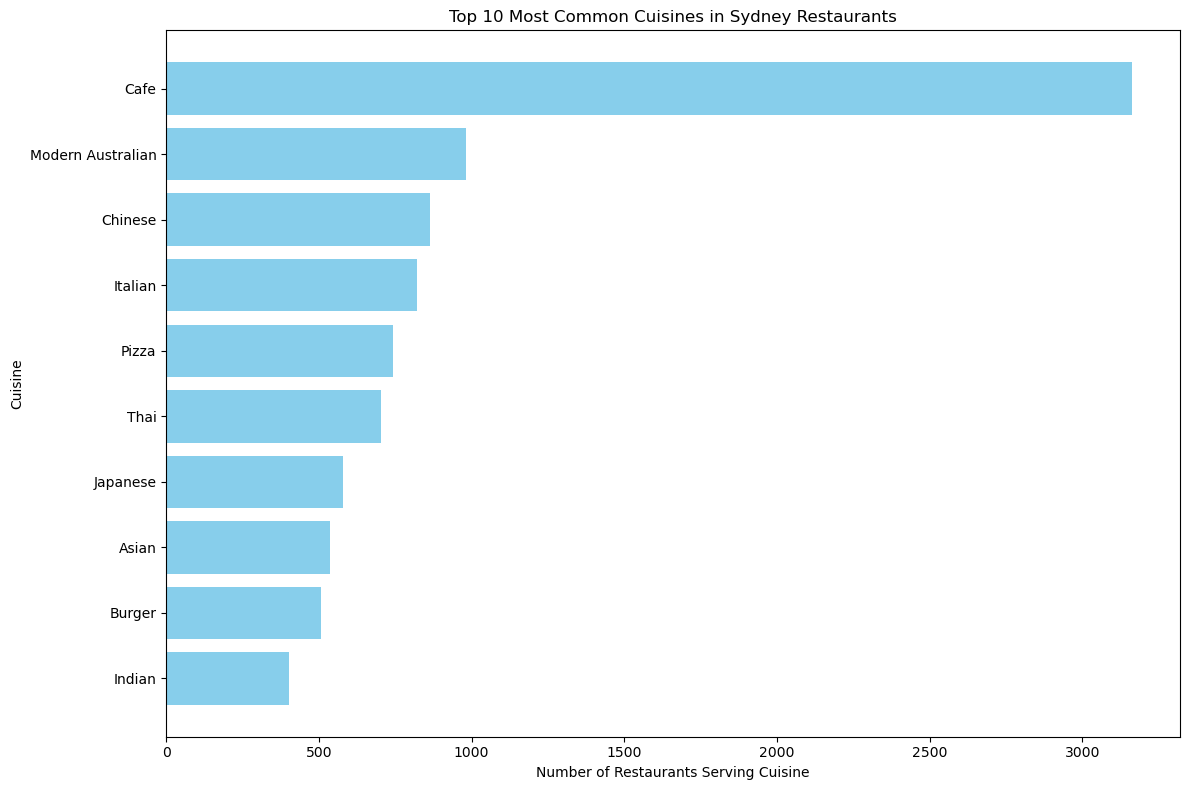

In [83]:
# Creating the plot for the 10 most popular cuisines 
# Creating a bar plot to highlight the top ten cuisines 
# Importing the counter function from collections 
from collections import Counter
# Counting the frequency of each unique cuisines
# A counter object called cuisine_counts is being created by using the counter function 
# It stores the name of the cuisine and that cuisine's total number of counts
cuisine_counts = Counter(cuisine for cuisines in cuisine_list for cuisine in cuisines)
# The most_common method on the cuisine_counts will return a lits of tuples 
# Each tuple will will contain the name of the cuisine and its count sorted by the highest count
# By using zip the tuples are being seperated into two lists, one for cuisines and other for counts  
cuisines, counts = zip(*cuisine_counts.most_common())  
# Plotting the top 10 data by using bar plots 
plt.figure(figsize=(12, 8))
plt.barh(cuisines[:10], counts[:10], color='skyblue') # Specifying the color of the bar to be sky blue 
plt.xlabel('Number of Restaurants Serving Cuisine')
plt.ylabel('Cuisine')
plt.title('Top 10 Most Common Cuisines in Sydney Restaurants')
plt.gca().invert_yaxis()  # To display the top cuisine at the top of the plot
plt.tight_layout()
plt.show()

**Reflection of Australian coffee culture:** As shown in the image, Cafe is by far the most common type of restaurant in Sydney, reflecting Australia's deeply rooted coffee culture. This culture began in the 1940s with Greek-owned establishments and has since grown, with independently owned cafes making up about 95% of all coffee shops in the country. The dominance of cafes in Sydney’s culinary scene reflects the laid-back, community-oriented lifestyle that Australians cherish. 

**Rise of Modern Australian Cuisine:** The second most common cuisine is modern australian, this cuisine draws from the diverse cultural backgrounds of immigrants who made australia their home. By blending international flavors with local cuisine and ingredents modern Australian cuisine highlights the Australia's and specifically Sydney's sydneys multiculturalism.  

**Chinese:** he third most common cuisine in the image, Chinese, is a testament to the significant Chinese immigrant population in Australia.

source: 
https://bizcup.com.au/australian-coffee-culture/#:~:text=At%20the%20turn%20of%20the,and%20coffee%20shops%20across%20Australia.

https://www.afr.com/life-and-luxury/food-and-wine/the-most-exciting-thing-about-australian-cuisine-right-now-20240517-p5jeep

https://www.homeaffairs.gov.au/research-and-statistics/statistics/country-profiles/profiles/peoples-republic-of-china

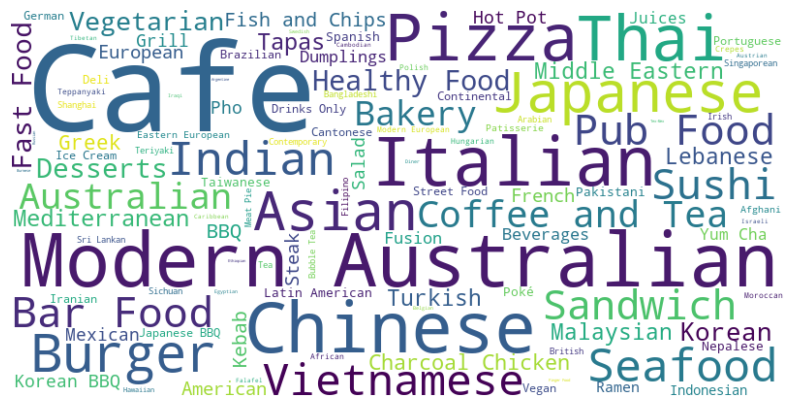

In [84]:
from wordcloud import WordCloud
# Generate a word cloud from the cuisine frequencies
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(cuisine_counts)
# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.show()

The word cloud can give a better picture of some of the more popular cuisines, apart from the top 3. we can see that, Italian and Pizza are very popular. We can also see that there is a growing demand for Newer flavors such as Japanese, Indian, Malaysian, Korean, Thai indicating a growing appreciation for diverse Asian foods in Sydney. 

##### **Which suburbs (top-3) have the highest number of restaurants**

In [85]:
# Finding the top 3 Suburbs with the highest number of restaurants
top_suburbs = zomato['subzone'].value_counts()
print(top_suburbs[0:3])

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


CBD with the restaurant count of 476 has the highest number of restaurants almost double of Surry hills which comes second with 260 restaurants and finally Parramatta comes third with 225 restaurants.  

It’s no surprise that Sydney’s CBD, the city's economic heart and central business district, boasts the highest concentration of restaurants. Attracting a large number of professionals, tourists, and residents, the area is home to numerous landmarks and offers a wide variety of dining options that cater to both international and local visitors seeking diverse culinary experiences. Just south of the CBD, Surry Hills is closely connected to the city center, and its vibrant, trendy atmosphere makes it an extension of Sydney’s bustling food scene, further enhancing its appeal as a popular dining destination.

source:

https://www.theurbandeveloper.com/articles/sydney-restaurants-jump-by-50-per-cent-over-the-last-decade


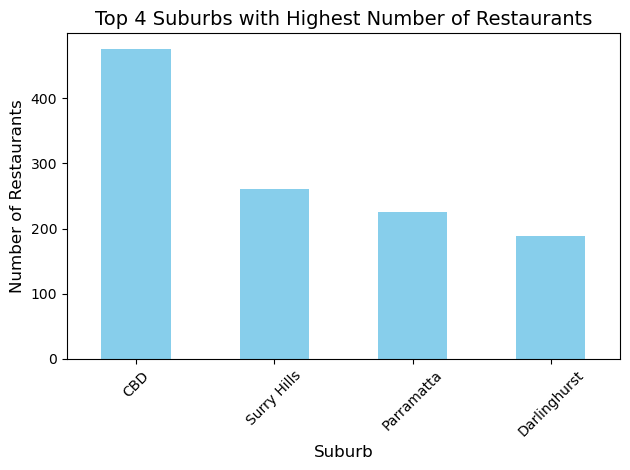

In [86]:
# Creating a bar plot to showcase the top 
top_4_suburbs = top_suburbs[0:4] # Extracting the top 4 suburbs with the highest number of restaurants
top_4_suburbs.plot(kind='bar', color='skyblue')  
# Creating the plot title and specifying font size
plt.title('Top 4 Suburbs with Highest Number of Restaurants', fontsize=14)
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout() # Adjusting the layout to prevent overlapping of labels and content
plt.show()

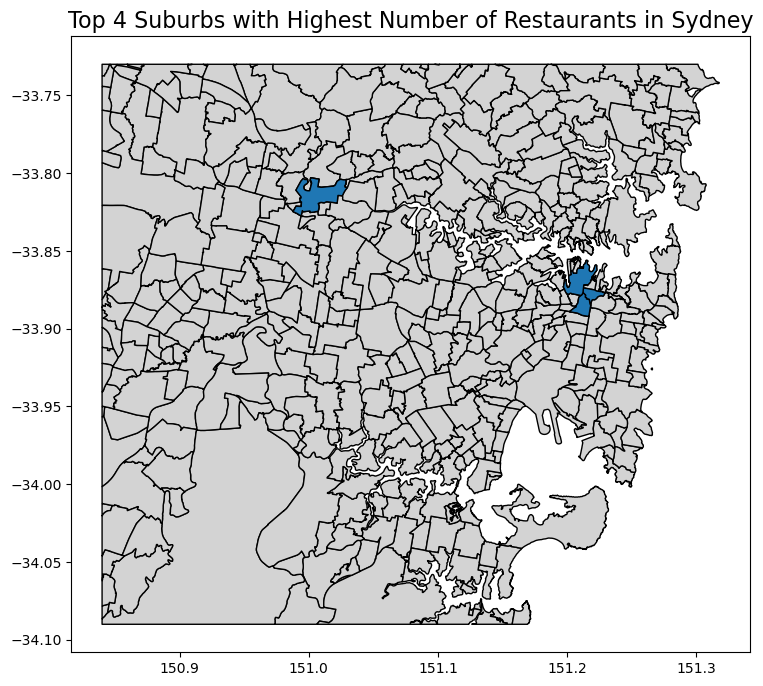

In [87]:
# Manually replace 'CBD' with 'Sydney' in top_4_suburbs to match the GeoJSON data
# In our GeoJSON, "CBD" is labeled as "Sydney" in the GeoJSON file.
# Therefore, replacing any occurrence of 'CBD' with 'Sydney' in the list of top 4 suburbs.
top_4_suburbs_names = top_4_suburbs.index.str.replace('CBD', 'Sydney', case=False)
# Standardize the suburb names in the GeoJSON data
# To ensure proper matching between suburb names in the GeoJSON and the zomato dataset,
# Converting all suburb names in the GeoJSON to lowercase and remove extra spaces.
sydney_geo['SSC_NAME_standardized'] = sydney_geo['SSC_NAME'].str.strip().str.lower()
# also standardizing the top 4 suburbs' names from the Zomato dataset (already replaced 'CBD' with 'Sydney')
# by converting them to lowercase and stripping any extra spaces to ensure they match the GeoJSON data.
top_4_suburbs_names_standardized = top_4_suburbs_names.str.strip().str.lower()
# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plot all suburbs in light grey
sydney_geo.plot(ax=ax, color='lightgrey', edgecolor='black')
# Highlight only the top 4 suburbs in blue
sydney_geo[sydney_geo['SSC_NAME_standardized'].isin(top_4_suburbs_names_standardized)].plot(ax=ax, color='#1f77b4', edgecolor='black')
# Adding a title
plt.title('Top 4 Suburbs with Highest Number of Restaurants in Sydney', fontsize=16)

plt.show()

From the Bar chart we can see CBD, Surry Hills, Paramatta and Darlinghurst are the suburbs which have the most amount of restaurants in Sydney City. From the Geopandas map we can see that CBD, Surry Hills and Darlinghurst are grouped together and is near the ocean these three areas are Sydneys historical waterfront areas it is not surprising that thre are so many restaurants there. 

But on the contrast, Parramatta, a suburb located inland (as indicated by geopandas map) and not near waterfront or historical land mark areas is emerging as a major food destination. With major infrastructure developments and a booming economy, the city’s night-time economy has grown significantly, attracting businesses, residents, and dining establishments, solidifying its position as a key urban and cultural hub in Western Sydney.

source:

https://www.abc.net.au/news/2024-05-01/parramatta-changes-dramatically-in-ten-years/103779398

##### **“Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not?**

In [88]:
# Ordering the "rating_text" category
# The category has a natural order (Poor < Average < Good < Very Good < Excellent)
# By explicitly defining this order, the data can be processed and visualized 
# In a logical sequence, which helps in making comparisons across categories
# This will help answering the question
# Stating the rating order
rating_order = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
# Reordering the 'rating_text" column based on the defined order
# the pd.Categorical() function is used to convert the rating_text column to ordinal 
zomato['rating_text'] = pd.Categorical(zomato['rating_text'], categories=rating_order, ordered=True)
# Verifying the reordering by using the dtype attribute 
zomato['rating_text'].dtype

CategoricalDtype(categories=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'], ordered=True, categories_dtype=object)

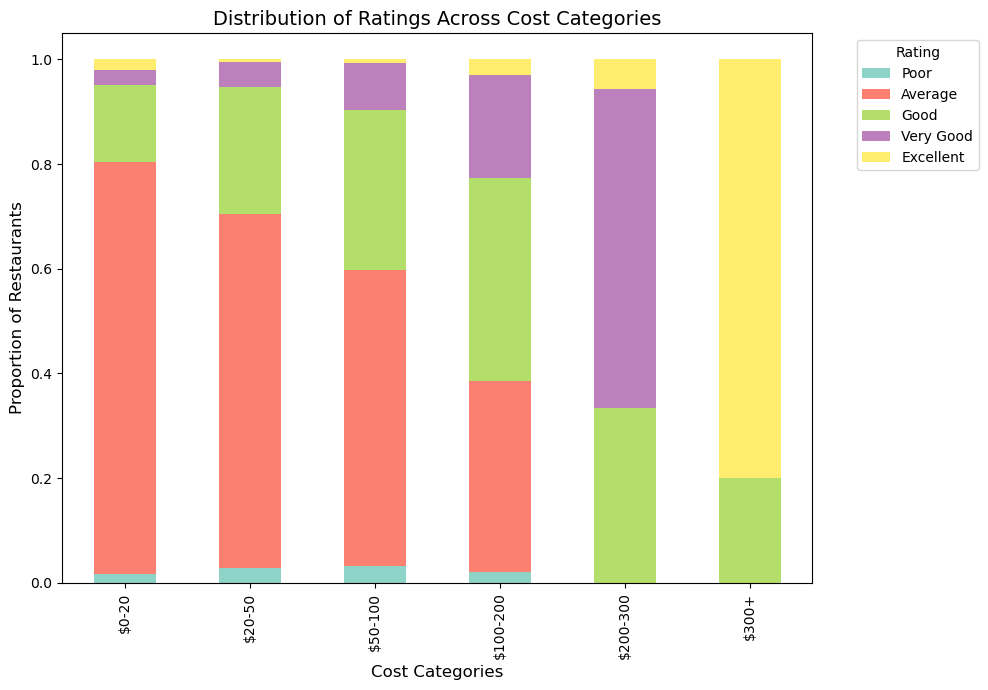

In [89]:
# Creating a bin to group the costs into categories
# If the cost data is not binned then it becomes difficult to compare ratings and costs of the restaurants
# Creating the bins for better visualization 
cost_bins = [0, 20, 50, 100, 200, 300, 500] 
# The 'pd.cut' function segments the 'cost' column into bins defined in the 'cost_bins'
zomato['cost_category'] = pd.cut(zomato['cost'], # The new cost_category column is created
                                 bins=cost_bins, # The costs are binned according to the cost_bins
                                 labels=['$0-20', '$20-50', '$50-100', '$100-200', '$200-300', '$300+'])
# `pd.crosstab` computes a frequency table (cross-tabulation) between 'cost_category' and 'rating_text'
# 'normalize="index"' normalizes the values across each row (i.e., within each cost category), giving the proportion
# of restaurants that fall into each rating category for each cost range.
cost_rating_crosstab = pd.crosstab(zomato['cost_category'], zomato['rating_text'], normalize='index')
# Plotting the stacked bar chart to visualize the distribution of ratings across cost categories
# Each bar represents a cost category, and the stacked sections represent different ratings.
# The `kind='bar'` argument specifies that this is a bar plot, and `stacked=True` ensures that the bars are stacked.
ax = cost_rating_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3')
# Setting the title and labels for the plot 
plt.title('Distribution of Ratings Across Cost Categories', fontsize=14)
plt.xlabel('Cost Categories', fontsize=12)
plt.ylabel('Proportion of Restaurants', fontsize=12)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
# Displaying the plot 
plt.tight_layout()
plt.show()

The bar chart shows how the restaurant ratings are distributed across different price ranges (binned according to cost categories). Each bar represents a cost category and the colored stacked sections within each of the bar represents the proportion of restaurants with different ratings. This can help to identify if higher-cost restaurants tend to have better ratings compared to loswer cost-ones. 

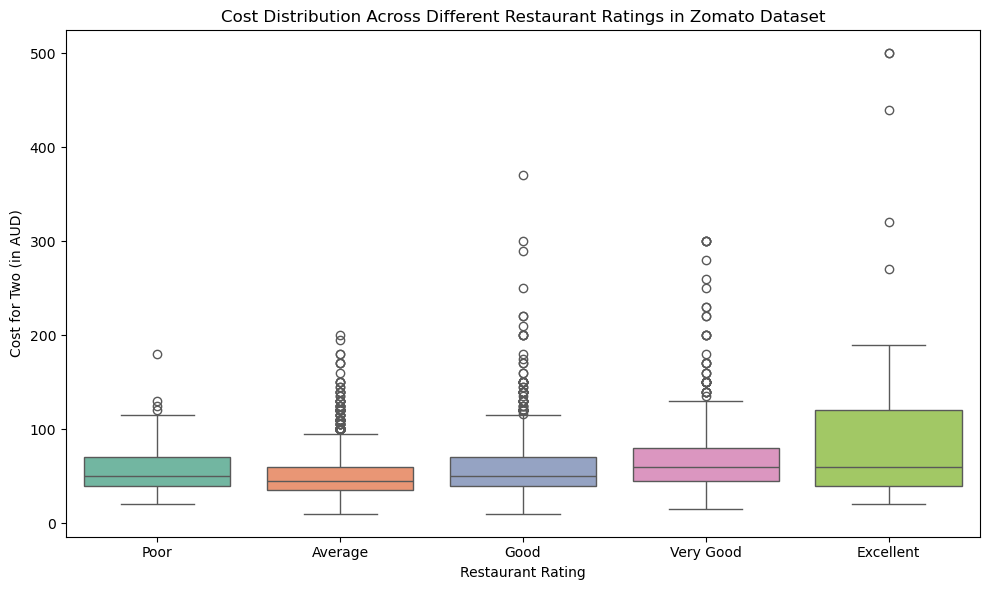

In [90]:
#Specifying the size of the plot which is to be created 
plt.figure(figsize=(10, 6))
# Creating a boxplot to visualize the distribution of 'cost' for each 'rating_text' category
# 'x' is set to 'rating_text', meaning each unique rating (Poor, Average, etc.) will be represented on the x-axis.
# 'y' is set to 'cost', showing how much it costs to dine at each restaurant.
# The hue has been set to 'rating_text' to ensure that the color of each bar is represented by the rating text
sns.boxplot(x='rating_text', y='cost', data=zomato, hue='rating_text', palette="Set2", dodge=False)
# Setting the title of the plot to make it clear what the chart is showing.
plt.title("Cost Distribution Across Different Restaurant Ratings in Zomato Dataset")
# Also setting the labels 
plt.xlabel("Restaurant Rating")
plt.ylabel("Cost for Two (in AUD)")
plt.legend([], [], frameon=False)  # Not keeping the legend
plt.tight_layout()
plt.show()




The boxplot shows the distribution of the price for two people based on the ratings of the restaurants. Each box represents a rating category. The Y-axis consist of the cost of two people. The boxplot helps to show the median and potential outliers in the cost for two people for restaurants. 

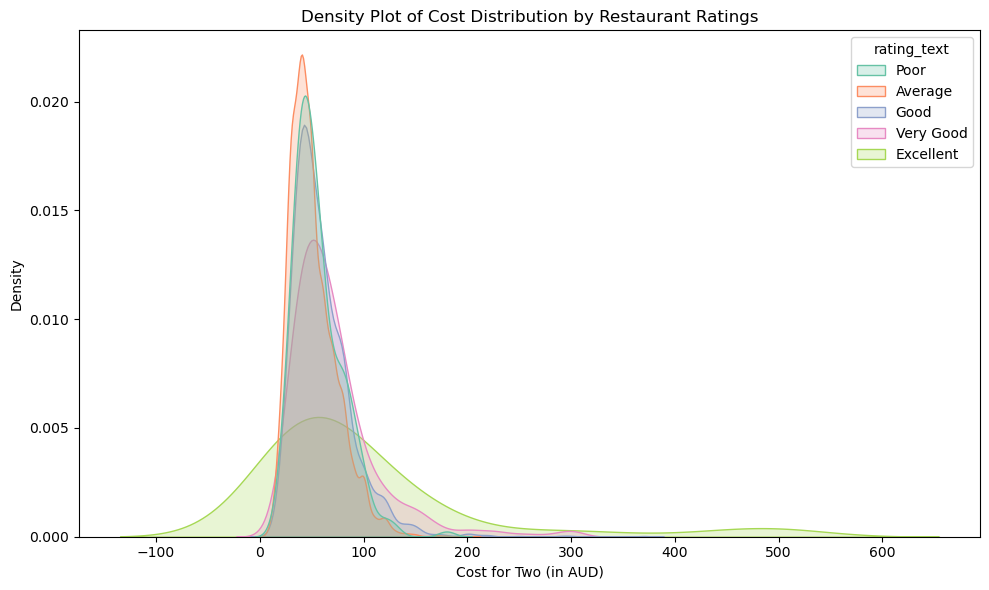

In [91]:
# Creating the density plot for cost distribution across different ratings
plt.figure(figsize=(10, 6))
# Creating the density plot where x is the cost for two 
# and the color of each density plot is specified by the rating text
sns.kdeplot(data=zomato, x='cost', hue='rating_text', fill=True, common_norm=False, palette="Set2")
# Giving the labels to the plot 
plt.title("Density Plot of Cost Distribution by Restaurant Ratings")
plt.xlabel("Cost for Two (in AUD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Density plots are a great way to visualize the spread of data, in this case five density plots have been created according to the rating of each restaurant

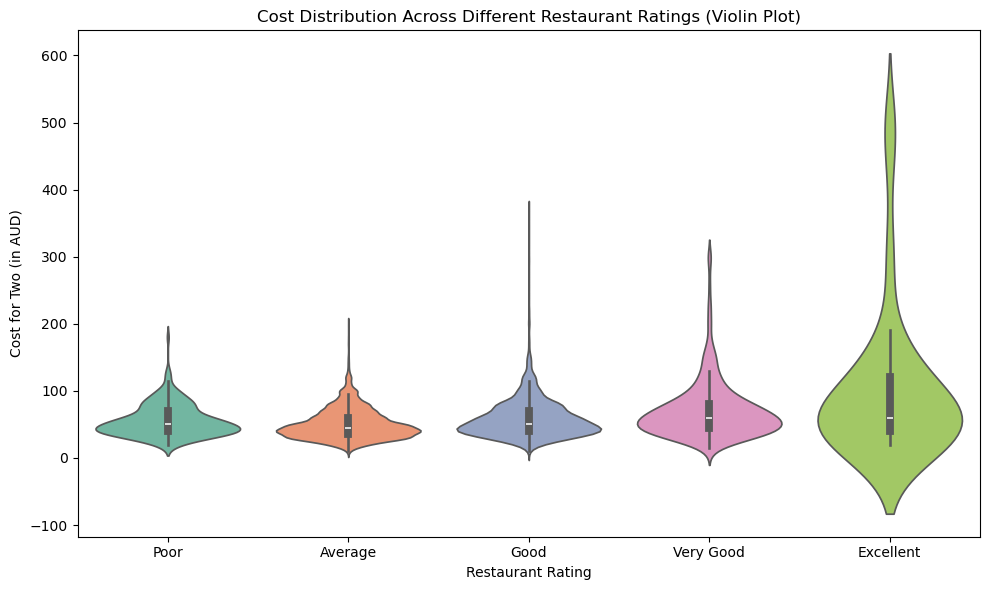

In [92]:
# Specifying the size of the plot which is to be created 
plt.figure(figsize=(10, 6))
# Creating a violin plot to visualize the distribution of 'cost' for each 'rating_text' category
# x axis represents the rating texts 
# y axis represents the cost for two people 
sns.violinplot(x='rating_text', y='cost', data=zomato, hue='rating_text', palette="Set2")
# Setting the plot title
plt.title("Cost Distribution Across Different Restaurant Ratings (Violin Plot)")
# Setting the labels 
plt.xlabel("Restaurant Rating")
plt.ylabel("Cost for Two (in AUD)")
plt.legend([], [], frameon=False)  # Not keeping the legend
plt.tight_layout()
plt.show()


Violin plots combine the features of density plots and boxplots, it shows the spread, median and potential outliers in the cost for restaurants within each rating category. The density is represented by the thickness of the violin. 

**Stacked Bar Chart (Distribution of Ratings Across Cost Categories)**

The stacked bar chart clearly shows that the restaurants with excellent ratings (yellow bars) are mostly concentrated in the $300 AUD cost category. Nearly all the $300+ restaurants are rated excellent with a small portion of $200-300 range as well. 

On the contrary, restaurants with "Poor" ratings (the cyan colored bars) can mostly be found in the $0-20 AUD cost category, with very little cyan in high cost categories. 

**Box Plot (Cost Distribution Across Ratings)**

The box-plot reinforces the trend which was observed in the bar chart. Restaurants with excellent ratings have the highest median cost (around $150 AUD) with a the largetst Interquartile range, and there are some outliters which cross the $300 AUD range. But the Boxplot also shows that there are other high cost restaurants which can be seen as outliers in boxes for Good and very good ratings. 

**Density Plot (Cost Distribution by Rating)**
From the density plot it is observed that excellent-rated restaurants have a very wide spread of the costs even though the tail of the density is extending beyond $200 AUD, it indicated many excellent rated restaurants are in the high cost category. 

And we can see that the density for the poor restaurants peak at arund $50 AUD, with almost to no presence in higher cost-ranges. 

**Violin Plot**

The violin plot shows that excellent-rated restaurants have a wide distribution of higher costs, with most clustered around $150-$200 AUD and some exceeding $300 AUD, indicating they are mostly costly. In contrast, poor-rated restaurants are concentrated in the $20-$50 AUD range, confirming they are rarely expensive.

**Conclusion**

Based on all the visuals and analysis I somewhat or partially agree with the statement. 

It is very evident that the most expensive restaurants have Excellent rating, a substancial number of excellent restaurants also fall in the lower to mid cost range (Indicated by Density and Violin plot), indicating that not all excellent rated restaurants are expensive. 

But the poor rated restaurants are mostly associated with less expensive options whith majority costing below $50 AUD.  

### Part A - 2 - Performing exploratory analysis for the variables of the data. 

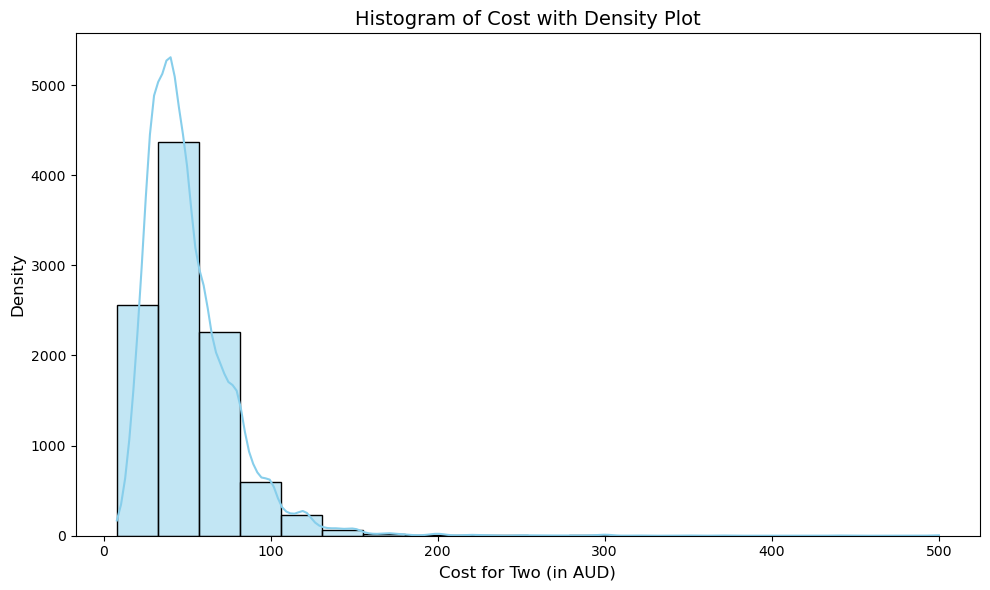

In [93]:
# Setting the figure size 
plt.figure(figsize=(10, 6))
# Creating a histogram with a density line
# 'dropna()' is used to remove any missing values from the 'cost' column 
# 'bins=20' sets the binwidth to 20
# 'kde=True' adds a density line
# 'color' and 'edgecolor' define the color of the bars and their borders
sns.histplot(zomato['cost'].dropna(), bins=20, kde=True, color='skyblue', edgecolor='black')
# Adding a title to the plot to describe what it represents
plt.title('Histogram of Cost with Density Plot', fontsize=14)
# Labeling the x-axis to specify that it represents the cost for two people (in AUD)
plt.xlabel('Cost for Two (in AUD)', fontsize=12)
# Labeling the y-axis to indicate it shows the density, rather than the raw frequency of restaurants
plt.ylabel('Density', fontsize=12)
# Using 'tight_layout()' to adjust spacing and prevent labels or titles from being cut off
plt.tight_layout()
# Finally, displaying the plot
plt.show()


**Histogram of Cost for Two people**

The histogram with the density plot indicates that majority of the restaurants cost around AUD 20 to AUD 60 for most people with a sharp peak around AUD 40. This suggests that most restaurants in Sydney are morderately priced. As the price increases beyond AUD 100, the frequency of high-cost restaurants drop significantly, it indicates that expensive dining options are less common in sydney. The long tail of the distribution suggests that there are few restaurants that are very very expensive, but they represent a small proportion of the overall market. 

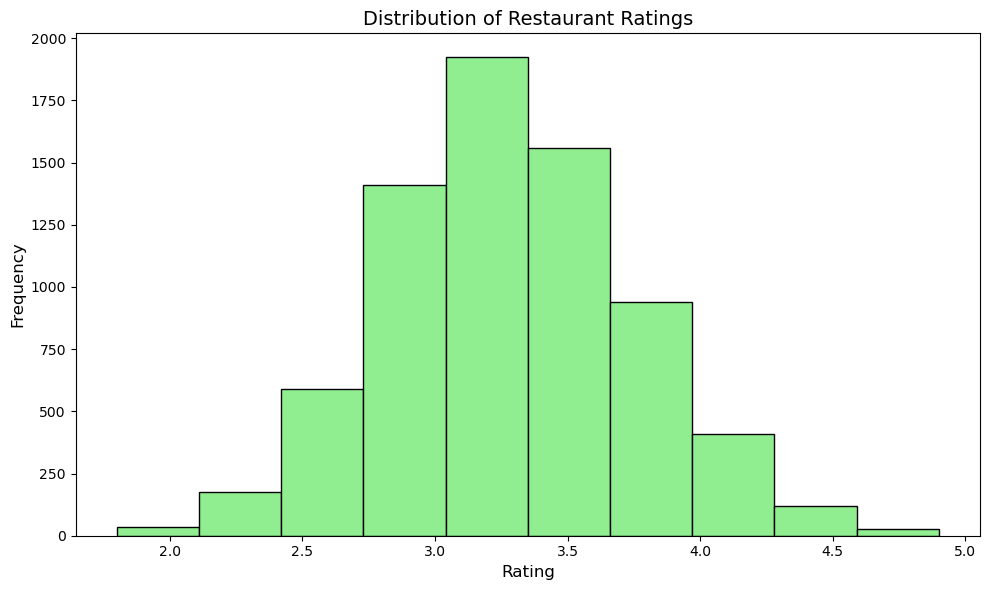

In [94]:
# Creating a histogram for the 'rating_number' variable
plt.figure(figsize=(10, 6))
# Using dropna() to remove null values 
# specifying the binwidth to 10 
# Specifying the fill colour of the bars and the edge color 
plt.hist(zomato['rating_number'].dropna(), bins=10, color='lightgreen', edgecolor='black')
# Setting the plot title 
plt.title('Distribution of Restaurant Ratings', fontsize=14)
# Setting the X and Y label 
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**Histogram of the Ratings of the restaurants**

The histogram is bell-shaped, suggestin that most restaurants have received average ratings, with a peak around 3.5. This suggests that most of the restaurants are rated between 3 and 3.5. Few restaurants fall into the lower or higher rating extrimes (below 2.5 or above 4.5), indicating that very poor rating and very high rating restaurants are not that very common. The histogram indicated that most dining experiences are morderately positive, with only a small number of restaurants being considred exceptionally good or very poor in quality. 

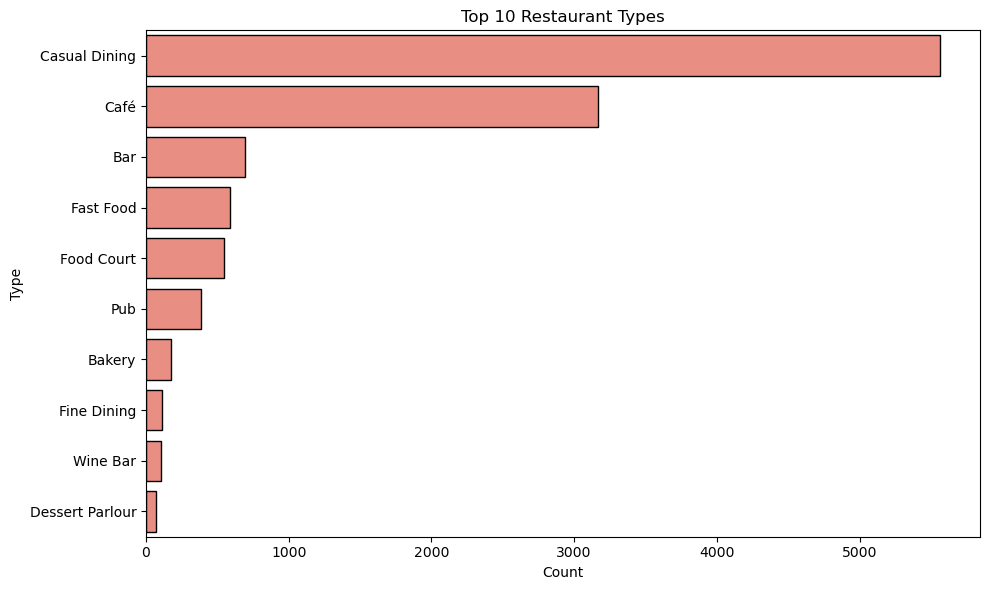

In [95]:
# Handling the missing values and converting the String lists to actual lists 
# 'type' column contains lists of restaurant types, some of which might be stored as strings (in string list format) or have NaN values
# 'fillna("[]")' replaces NaN (missing) values with an empty list to prevent errors during further processing
zomato['type'] = zomato['type'].fillna('[]')  
# 'eval()' is used to convert string representations of lists into actual Python lists (only if they are stored as strings)
# 'apply()' applies this conversion to every row in the 'type' column where needed
# This ensures that all values in the 'type' column are lists, allowing for proper handling
zomato['type'] = zomato['type'].apply(lambda x: eval(x) if isinstance(x, str) else x)
# The 'type' column contains lists, where each restaurant can belong to multiple types 
# 'explode()' function separates each item in the list into its own row, so that each type gets its own row for counting
zomato_exploded = zomato.explode('type')
# Count the occurrences of each restaurant type
type_counts = zomato_exploded['type'].value_counts().head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=type_counts.values, y=type_counts.index, color='salmon', edgecolor='black')
plt.title("Top 10 Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


**Barchart for the most common Restaurant types** 

Casual dining is the most common restaurant type with over 5000 entries, suggesting that casual dining is most preferred or widespread. 

Cafes are the second most common type of restaurants, highlighting the significant cafe culture which has been discussed previously 

Bars, fast food, Food courts, pubs have substantial representation, reflecting easy and informal dining experience

More niche categories of restaurants like Fine Dining Wine bars, Dessert Parlour and Bakeries are not as common as the other type of restaurants. 

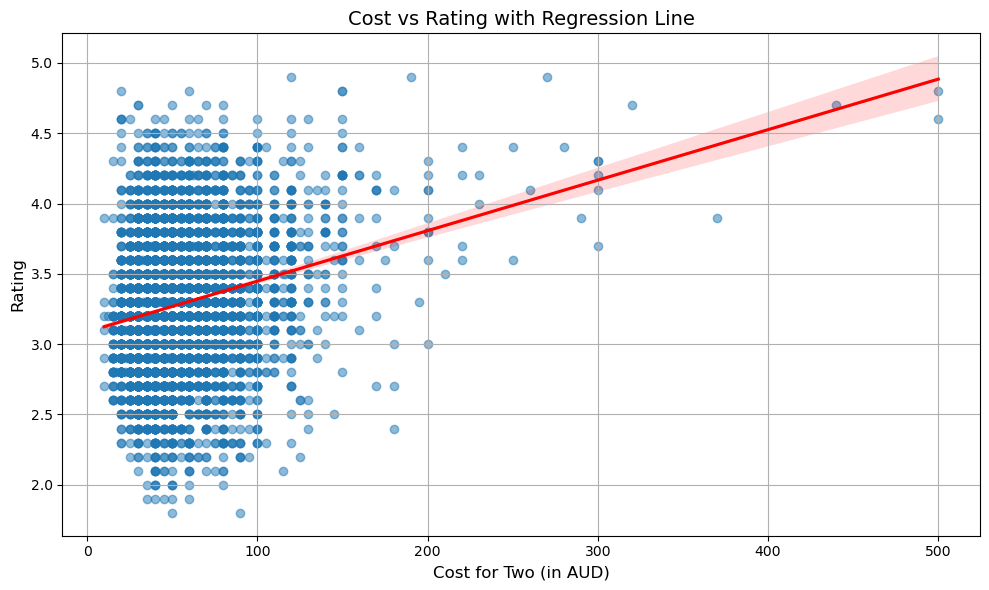

In [96]:
# Creating a scatter plot of Cost vs Rating with a regression line 
plt.figure(figsize=(10, 6))
# 'sns.regplot()' is used to create a scatter plot of 'cost' vs 'rating_number' and fit a regression line through the data
# 'x='cost'' sets the cost for two people as the variable for the x-axis
# 'y='rating_number'' sets the restaurant rating as the variable for the y-axis
# 'scatter_kws={'alpha':0.5}' reduces the transparency (alpha) of the scatter points to 0.5, making overlapping points visible
# 'line_kws={"color":"red"}' sets the color of the regression line to red for easy distinction
sns.regplot(x='cost', y='rating_number', data=zomato, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
# Adding titles and lables to the plot 
plt.title('Cost vs Rating with Regression Line', fontsize=14)
plt.xlabel('Cost for Two (in AUD)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True) # This shows the grid behind the points 
plt.tight_layout()
plt.show()

**Scatterplot for Cost vs Rating**

The scatterplot with a regression line shows a positive correlation between cost and restaurant ratings. As the cost increases, ratings tend to get higher, specifically for restaurants costing over AUD 200. But most dense polots are between AUD 0 to AUD 100, showing that most restaurants fall within this cost range but their rating can vary very widly from 3.0 to 4.5 plus. It implies that while more expensive restaurants generally receive better ratings cheaper options can still be highly rated. 

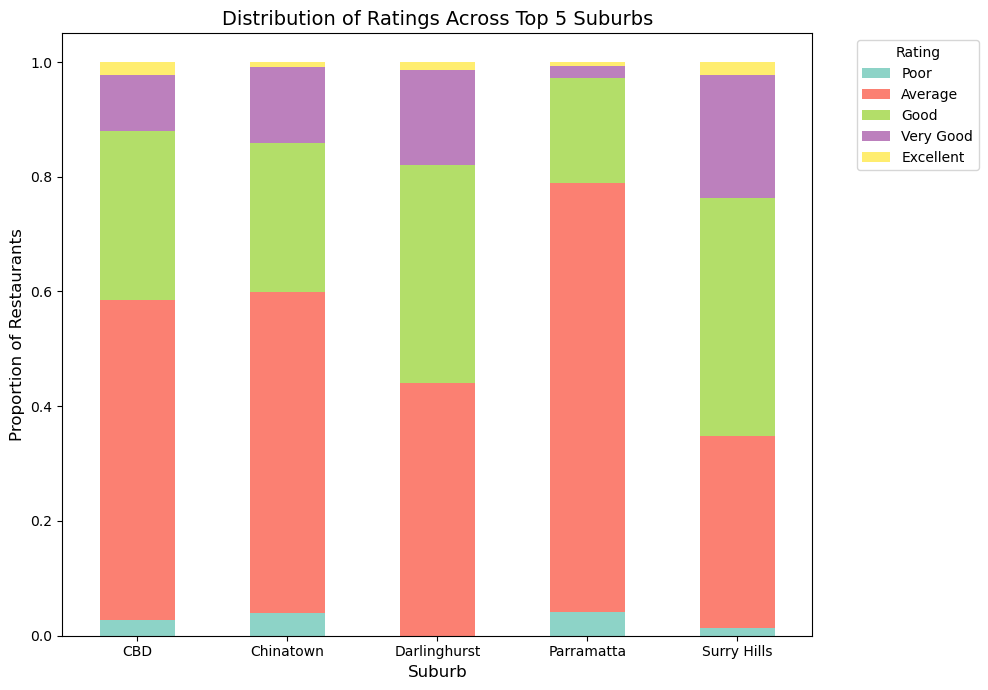

In [97]:
# Extracting the top 5 suburbs with the highest number of restaurants
# 'zomato['subzone'].value_counts()' counts how many restaurants are present in each suburb
# 'head(5)' selects the top 5 suburbs based on restaurant counts
# '.index' extracts just the names of those suburbs as a list of indexes (suburb names)
top_5_suburbs = zomato['subzone'].value_counts().head(5).index
# 'pd.crosstab()' creates a frequency table where each row represents a suburb and columns represent ratings
# 'normalize="index"' normalizes the counts by the total for each suburb, so that the rows sum to 1, giving proportions
# This allows us to compare the relative distribution of ratings across suburbs, regardless of the total number of restaurants
rating_suburb_crosstab = pd.crosstab(zomato[zomato['subzone'].isin(top_5_suburbs)]['subzone'], 
                                     zomato['rating_text'], normalize='index')
# Creating a stacked bar plot for the ratings in the top 5 suburbs
rating_suburb_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='Set3')
# Setting plot title and labels
plt.title('Distribution of Ratings Across Top 5 Suburbs', fontsize=14)
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Proportion of Restaurants', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The stacked barcharts show the distribution of restaurant ratings accross the top 5 suburbs. In all suburbs the majority of the restaurants are rated as Good or Average. With ratings of Very Good and Excellent being less common. Surry Hills has a notably higher proportion of Good and Very Good rated restaurants, while Darlinghurst has a higher percentage of Average ratings. CBD and Parramatta display a more even distribution between Average and Good ratings. Restaurants rated Poor are relatively rare in all top suburbs.

### Part A - 3 - Producing Cusine Density map

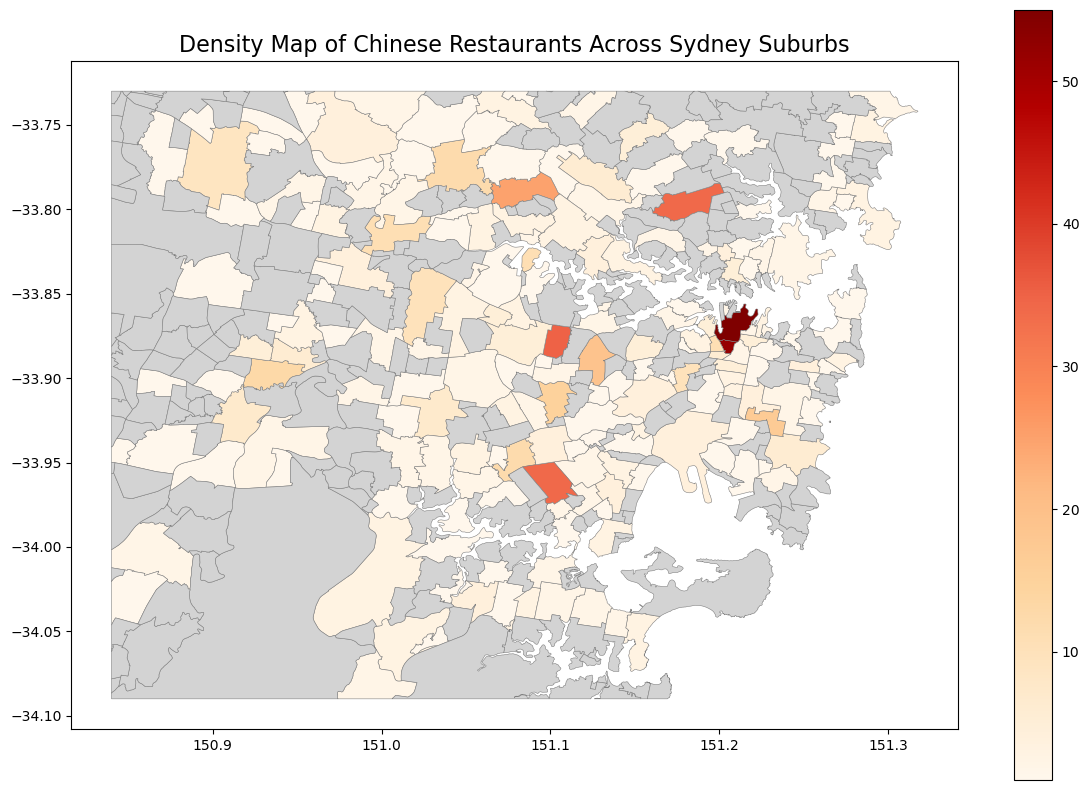

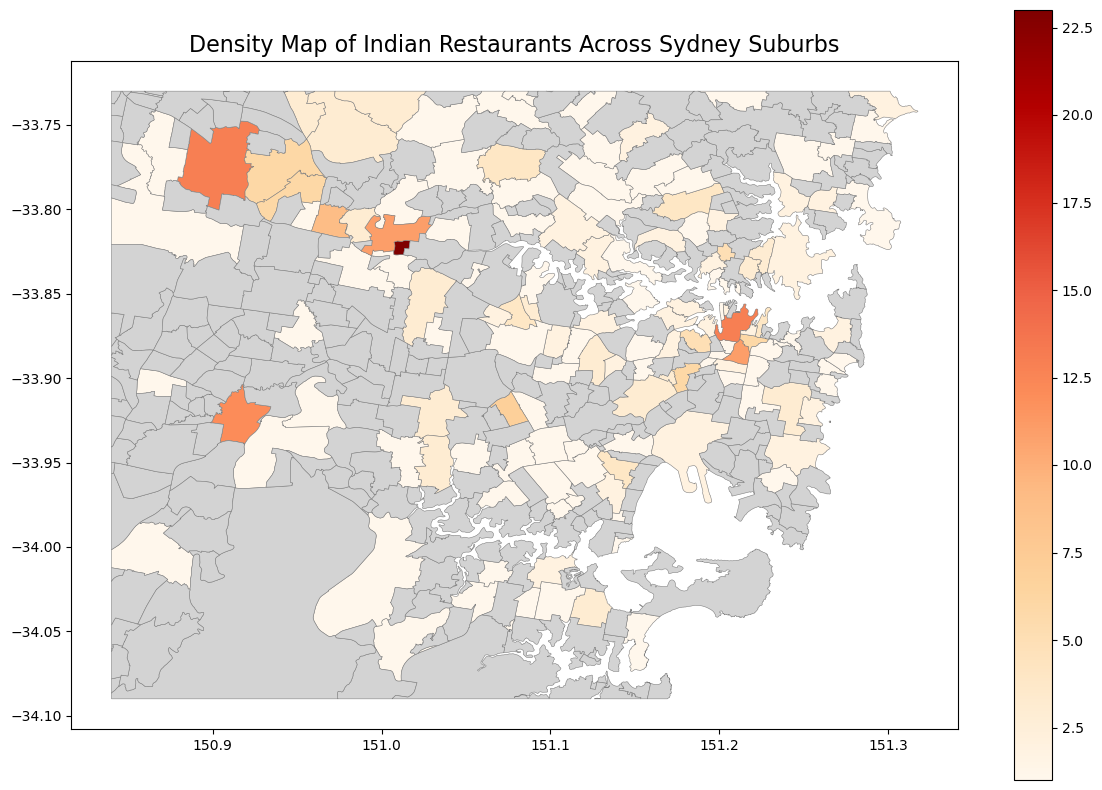

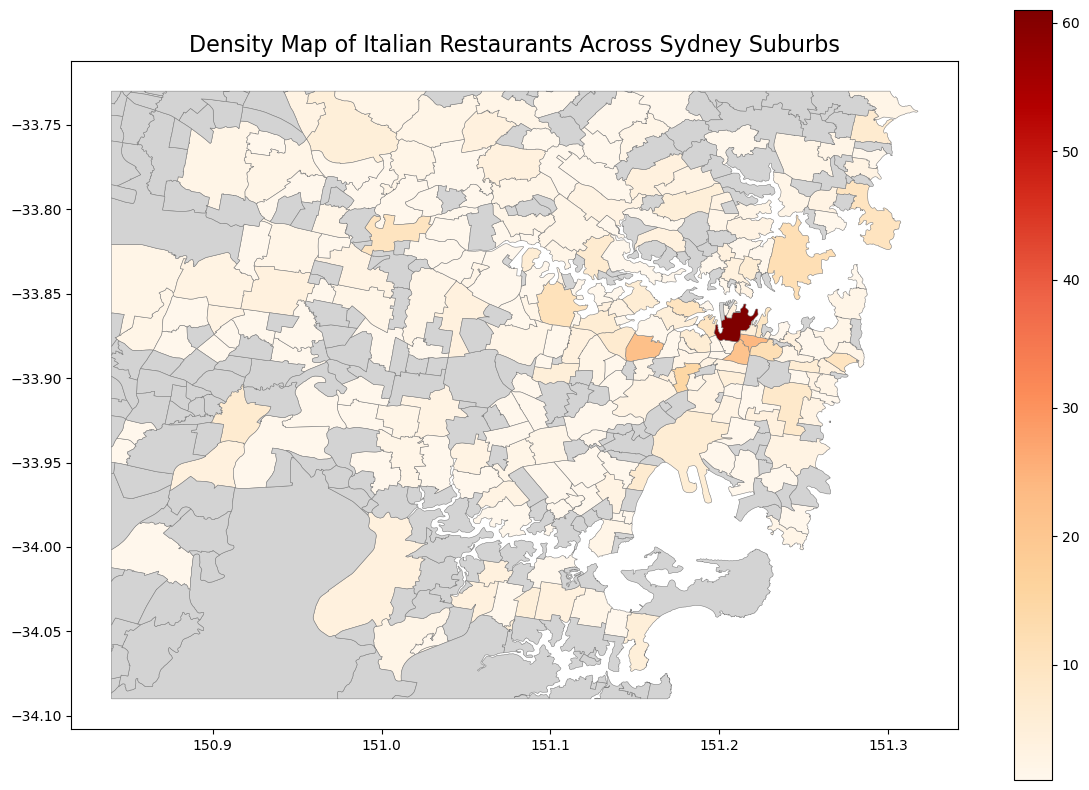

In [98]:
# Creating a function to generate a density map for specified cuisines 
def show_cuisine_densitymap(cuisine):
    # # Filtering the main Zomato dataframe to include only restaurants that serve the specified cuisine
    # The 'apply' function with a lambda expression checks if the specified cuisine is present in the cuisine lis
    specific_cuisine = zomato[zomato['cuisine'].apply(lambda x: cuisine in x)]
    # Converting the filtered Zomato dataframe into a GeoDataFrame
    # This is done using the restaurant's longitude (lng) and latitude (lat) to create geometrical points.
    # The 'crs' parameter defines the coordinate reference system as EPSG:4326 (WGS 84).
    zomato_geo = gpd.GeoDataFrame(specific_cuisine, 
                                  geometry=gpd.points_from_xy(specific_cuisine.lng, specific_cuisine.lat), 
                                  crs='EPSG:4326')
    # Ensuring that the restaurant data and suburb data are in the same coordinate reference system (CRS)
    zomato_geo = zomato_geo.to_crs(sydney_geo.crs)
    # Conducting a spatial join to find which restaurants are located within each suburb
    # The 'sjoin' function performs a spatial join, where restaurants are matched to the suburb polygons they fall within.
    restaurants_within_suburb = gpd.sjoin(zomato_geo, sydney_geo, how='inner', predicate='within')
    # # Counting the number of restaurants serving the specified cuisine per suburb
    # The 'groupby' function is used to group by suburb names (SSC_NAME) and count the occurrences.
    suburb_cuisine_counts = restaurants_within_suburb.groupby('SSC_NAME').size().rename('num_restaurants')
    # Merging the count data back into the Sydney suburb GeoDataFrame
    # This combines the suburb geometries with the restaurant counts, enabling visualization.
    sydney_suburbs_merged = sydney_geo.set_index('SSC_NAME').join(suburb_cuisine_counts)
    # The 'plot' function generates the map, coloring the suburbs based on the number of restaurants.
    # The 'cmap' parameter sets the color map for density visualization, with 'OrRd' indicating a range from light to dark.
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sydney_suburbs_merged.plot(column='num_restaurants', cmap='OrRd', legend=True, 
                               edgecolor='grey', linewidth=0.4, missing_kwds={"color": "lightgrey"}, ax=ax)
    #Setting the title of the plot to clearly indicate which cuisine is being visualized
    ax.set_title(f"Density Map of {cuisine} Restaurants Across Sydney Suburbs", fontsize=16)
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()
    
# Example: Generate the map for 'Chinese' cuisine
show_cuisine_densitymap('Chinese')

# Example: Generate the map for 'Indian' cuisine
show_cuisine_densitymap('Indian')

# Example: Generate the map for 'Italian' cuisine
show_cuisine_densitymap('Italian')

### Part A - 4 - Investigating the deployment of interactive plotting

**Limitations of Non-Interactive Plotting and the role of Interactive Libraries in the case of Data visualization**

Non-interactive plotting libraries are very useful for static visualization, these are the most common form of visualizatoins. Static visualization get's the job done most of the time because in most cases the information which needs to be communicated can be easily communicated with standard static visualizations. But if the data set is very complex and there is a high number of observations, static plots will fall short. Because static visualizations only represent a snapshot of the data, making it difficult to delve deeper into the details of the dataset. 

Interactive plotting provides users a better experience. It allows for zooming into the data, hovering and selecting specific data points to see precise values. In this case interactive plotting could have been used to provide a more nuanced analysis without generating multiplt plots. Interactive plots also provides the option for real-time filtering, so users can dynamically select the subsets of data. 

In conclusion, it can be said that the flexibility of interactive plotting libraries resove the inherent limitations of static plots. 


Source: 

https://www.linkedin.com/advice/3/what-pros-cons-using-interactive-vs-static-data-visualization

https://medium.com/@grow.com/interactive-vs-static-which-data-visualization-style-is-right-for-your-business-f5dc0a82cb40



In [99]:
# Initializing an interactive scatter plot using Plotly 
fig = px.scatter(
    zomato, # The data source for the plot 
    x='cost', # Setting the x-axis of the to be the cost column
    y='rating_number', # Setting the y-axis to be the rating column 
    hover_name='title', # When the user will hover over a point the title of the restaurant will be displayed
    hover_data=['subzone', 'cuisine', 'votes'], # Additional data which will be displayed 
    color='rating_text', # The color of the plot is set as the rating text
    size='votes',  # The size of the plots are set according to the number of votes the restaurant received
    title="Interactive Scatter Plot: Cost vs Rating (Point Size by Votes)", # Setting the title of the plot 
    labels={'cost': 'Cost for Two', 'rating_number': 'Restaurant Rating'} # Setting the labels 
)
# Show the interactive plot
fig.show()


To prove that interactive plots offer more depth to data, A scatter plot has been created, This is a cost VS rating scatter plot where the size of each point is given by the total number of votes received by the restaurant. 

Multiple plots were created to answer the question, "Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not?"

But the interactive plot can answer the question well, because of the Hover interactivity the plots can be interacted with showing not only the rating but also the number of votes each restaurant recieved, larger dots with red color indicates popular restaurants with high ratings, and the small orange points indicate poor rated restaurants with less votes. The legend is also interactive. Restaurants with specific ratings can be selected. 

From this question it is more easier to support my answer of partially agreeing, because it can be clearly seen from this plot that it is true that more expensive restaurants tend to have higher ratings. But there are a lot of reasonably priced or cheaper restaurants with higher votes and really good ratings. 

In [122]:
# Creating an interactive bar plot using plotly 
# Grouping the data according to uburb and counting number of restaurants in each suburb
top_10_suburbs = zomato['subzone'].value_counts().nlargest(10).reset_index()
# Renaming the columns for ease of use in making the plot 
top_10_suburbs.columns = ['suburb', 'restaurant_count'] # Renaming the columns as suburb, and restaurant_count
# Initializing the plotly barplot 
fig = px.bar(top_10_suburbs, # Using the newly created dataframe 
    x='suburb', # Setting x-axis as the suburbs 
    y='restaurant_count', # Setting the y-axis as the restaurant counts 
    # Setting the tile and the labels 
    title="Top 10 Suburbs by Number of Restaurants",
    # Setting the interactive labels 
    labels={'suburbs': 'suburb', 'restaurant_count': 'Number of Restaurants'},
    hover_data=['restaurant_count'])

# Show the interactive plot
fig.show()


This interactive barplot is created to show that, even simpler plots such as barcharts are better when they are interactive, because the user can hover over each bar and look at plethora of information which is not possible with regular barplots. 

### Part A - 5 - Tableau: 

Link for Tableau:

https://public.tableau.com/views/DSTS_Assignment_1/Dashboard2?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link